In [20]:
# Importamos las librerías necesarias para el análisis
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [21]:
# Cargamos los datos desde el archivo CSV
datos = pd.read_csv("C:/Users/david/segundaEvaluacion/Conjunto de Datos/samsung.csv")

In [22]:
# Exploramos los primeros datos del archivo
datos.head()

,Date,Close,Volume
0,02/01/2008,10880,18047200
1,03/01/2008,10920,19346500
2,04/01/2008,10780,17997350
3,07/01/2008,10380,39787200
4,08/01/2008,10320,24783700


In [23]:
# Preprocesamos los datos seleccionando las columnas de interés: 'Close' y 'Volume'
data = datos[['Close', 'Volume']]

In [24]:
# Normalizamos los datos para que todas las características tengan la misma escala
datos_escalada = preprocessing.Normalizer().fit_transform(data)

In [25]:
# Copiamos los datos preprocesados para usarlos en el modelo
X = datos_escalada.copy()

In [26]:
# Determinamos el número óptimo de clusters utilizando la técnica de "codo"
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]

In [27]:
# Calculamos el puntaje de cada modelo K-Means y graficamos la curva de codo
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

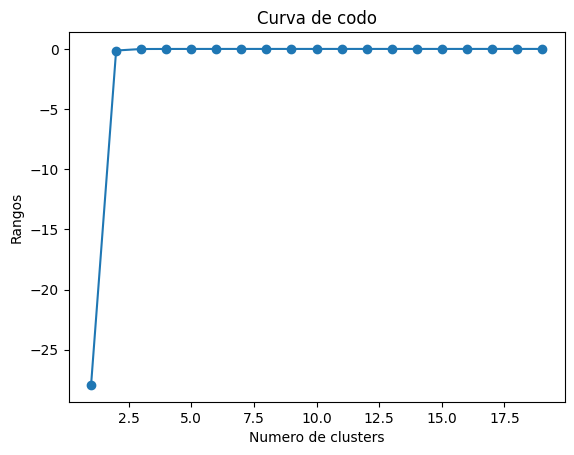

In [28]:
# Graficamos la curva de codo para identificar el mejor número de clusters
plt.plot(Nc, score, marker='o')
plt.xlabel('Numero de clusters')
plt.ylabel('Rangos')
plt.title('Curva de codo')
plt.show()

In [29]:
# Ejecutamos K-Means con el número de clusters seleccionado basado en la curva de codo
kmeans = KMeans(n_clusters=3).fit(X)

In [30]:
# Obtenemos los centroides de los clusters
centroids = kmeans.cluster_centers_
print(centroids)

[[0.00224737 0.99999613]
 [1.         0.        ]
 [0.35026946 0.93664898]]


In [36]:
# Realizamos la predicción de clusters
labels = kmeans.predict(X)

In [37]:
# Asignamos colores a cada cluster para visualización
colores = ['red', 'green', 'blue']
asignar = []
for row in labels:
    asignar.append(colores[row])

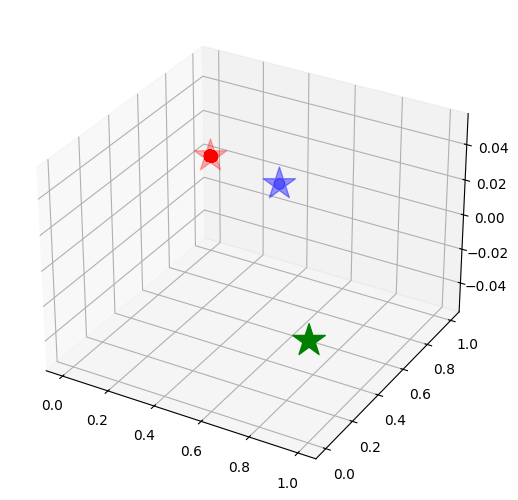

In [38]:
# Visualizamos los clusters en 3D
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(X[:, 0], X[:, 1], c=asignar, s=60)
ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', c=colores, s=600)
plt.show()

In [39]:
# Comparación de las variables "Close" y "Volume" en 2D
f1 = data['Close'].values
f2 = data['Volume'].values

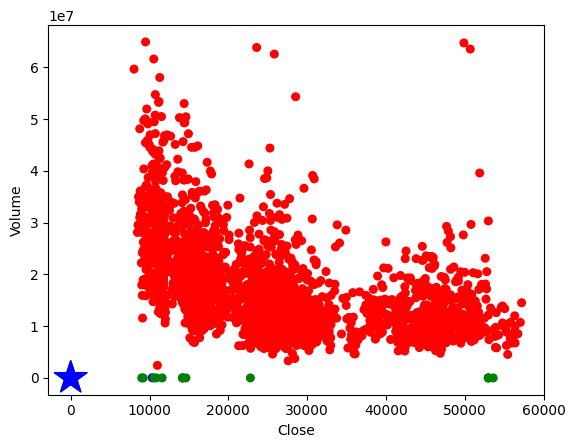

In [40]:
# Graficamos los datos con los colores asignados según los clusters
plt.scatter(f1, f2, c=asignar, s=30)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c=colores, s=600)
plt.xlabel('Close')
plt.ylabel('Volume')
plt.show()